In [1]:
## increased volatility to 0.4 & increased sharpe ratio to 0.5

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

/Users/janviaswani/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

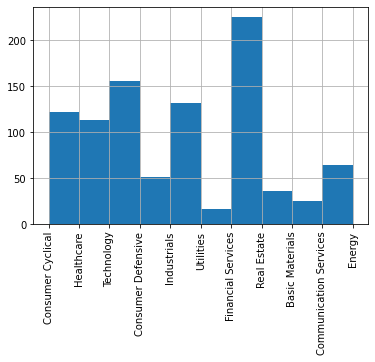

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


## Filter stocks on Volatility

In [9]:
df = df[df["AHV_5y"] < 0.4]

In [10]:
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,1.31,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,1.24,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,TWNK,"Hostess Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,21.1800,0.082395,2.930825e+09,...,0.69,0.626,0.1008,22.531916,33.833866,7.144818,999.00,0.103076,0.279978,0.076044
915,VLY,Valley National Bancorp,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.9850,0.063284,5.691251e+09,...,1.21,1.110,0.0500,11.654166,12.599098,3.083582,999.00,0.166287,0.360308,0.060302
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,0.85,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,1.35,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788


In [11]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               36
Financial Services        36
Technology                29
Consumer Cyclical         20
Healthcare                16
Consumer Defensive        12
Communication Services     8
Basic Materials            7
Real Estate                5
Utilities                  1
Energy                     1
Name: sector, dtype: int64

In [12]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [13]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [14]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [15]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering Stocks based on Sharpe Ratio

In [16]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [17]:
sharpe_list

[0.458, 0.141, 0.454, 0.741, 0.288, 0.458, 0.413]

In [18]:
df_BM["sharpe"] = sharpe_list
df_BM

<ipython-input-18-95ef34005f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.86,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.458
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.77,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.141
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.59,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.454
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.96,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.288
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.458
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.45,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.413


In [19]:
df_BM = df_BM[df_BM["sharpe"] > 0.5]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741


# Consumer Defensive

## Filtering Stocks based on Sharpe Ratio

In [20]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [21]:
sharpe_list

[0.039,
 0.14,
 0.062,
 -0.324,
 0.444,
 0.339,
 0.061,
 0.313,
 0.302,
 0.036,
 0.107,
 0.28]

In [22]:
df_CD["sharpe"] = sharpe_list
df_CD

<ipython-input-22-7e23e832677b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.039
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.140
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.062
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.79,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.324
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.444
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.339
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.00,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.061
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.29,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.313
754,PRDO,Perdoceo Education Corporation,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,10.11,-0.012971,7.087666e+08,...,1.569,0.1500,5.877907,6.443594,5.055000,999.00,0.160209,0.393648,0.007507,0.302
761,PSMT,"PriceSmart, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,70.56,0.011350,2.177658e+09,...,3.180,0.1500,17.465345,22.188679,35.280000,999.00,0.123741,0.322618,-0.031776,0.036


In [23]:
df_CD = df_CD[df_CD["sharpe"] > 0.5]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [24]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [25]:
sharpe_list

[0.193, 0.68, 0.573, 0.833, 0.363]

In [26]:
df_RE["sharpe"] = sharpe_list
df_RE

<ipython-input-26-3d0c71ae424c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.193
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.363


In [27]:
df_RE = df_RE[df_RE["sharpe"] > 0.5]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833


# Financial Services

## Filtering Stocks based on Sharpe Ratio

In [28]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [29]:
sharpe_list

[0.666,
 0.037,
 0.255,
 0.448,
 0.478,
 0.377,
 0.342,
 0.316,
 0.504,
 0.391,
 0.693,
 0.178,
 0.043,
 0.233,
 0.115,
 0.074,
 0.83,
 0.628,
 0.264,
 0.445,
 0.407,
 0.165,
 0.31,
 -0.472,
 0.171,
 0.155,
 0.292,
 0.068,
 0.176,
 0.018,
 0.251,
 0.264,
 0.244,
 0.531,
 0.315,
 0.202]

In [30]:
df_FS["sharpe"] = sharpe_list
df_FS

<ipython-input-30-82850e6b4bab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.930,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.037
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.740,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.255
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.680,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.448
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.590,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.478
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.050,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.377
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.010,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.342
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.680,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.316
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.410,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.504
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.230,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.391


In [31]:
df_FS = df_FS[df_FS["sharpe"] > 0.5]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.504
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.693
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.830
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.628
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.531


# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [32]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [33]:
sharpe_list

[0.355,
 0.625,
 0.434,
 0.404,
 0.102,
 0.714,
 0.48,
 0.496,
 0.325,
 0.254,
 0.191,
 0.888,
 0.405,
 0.112,
 0.358,
 0.971,
 0.097,
 0.667,
 0.483,
 0.472]

In [34]:
df_CC["sharpe"] = sharpe_list
df_CC

<ipython-input-34-bfbc42f5152d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.355
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.434
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.404
93,HAS,"Hasbro, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,95.7150,0.136486,1.320360e+10,...,3.278,0.1770,17.857275,29.199205,5.897359e+01,10.44,0.143190,0.352387,0.050021,0.102
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653,0.480
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.496
182,ROST,"Ross Stores, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,93.0700,0.144106,3.288442e+10,...,4.465,0.9374,17.363806,20.844343,5.087129e+03,16.14,0.144406,0.347761,0.073798,0.325
208,VFC,V.F. Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,58.3200,0.080890,2.290705e+10,...,3.120,0.4574,15.677419,18.692308,2.458758e+02,12.73,0.199108,0.349883,0.071379,0.254


In [35]:
df_CC = df_CC[df_CC["sharpe"] > 0.5]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.888
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.971
792,RUSHA,"Rush Enterprises, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,49.3400,0.123774,2.712585e+09,...,3.708,0.2866,11.803828,13.306365,6.774551e+01,999.00,0.167502,0.352175,0.187417,0.667


# Technology

## Filtering Stocks based on Sharpe Ratio

In [36]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [37]:
sharpe_list

[0.613,
 0.768,
 0.421,
 0.762,
 0.388,
 0.599,
 0.554,
 0.524,
 0.743,
 1.051,
 0.149,
 0.301,
 0.288,
 -0.257,
 0.878,
 0.699,
 0.656,
 0.314,
 0.66,
 0.036,
 0.204,
 0.293,
 0.336,
 0.714,
 0.421,
 0.59,
 0.636,
 0.176,
 0.689]

In [38]:
df_tech["sharpe"] = sharpe_list
df_tech

<ipython-input-38-15272ba12eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.421
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
89,GLW,Corning Incorporated,Technology,Increase,Above Fair Price,UnderValued,Sustainable,41.4800,0.146336,3.539936e+10,...,1.004,0.2214,17.879310,41.314743,35.665593,19.42,0.150484,0.325524,0.114638,0.388
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.599
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.554
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.524
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.743
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.051


In [39]:
df_tech = df_tech[df_tech["sharpe"] > 0.5]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.599
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.554
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.524
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.743
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.051
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.6200,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.878
621,MANT,ManTech International Corporati,Technology,Increase,Above Fair Price,UnderValued,No Data,78.5700,0.109370,3.200871e+09,...,3.401,0.0538,22.512894,23.102028,17.896575,999.00,0.115232,0.344249,0.170329,0.699


# Industrials

## Filtering Stocks based on Sharpe Ratio

In [40]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [41]:
sharpe_list

[0.396,
 0.767,
 0.743,
 0.401,
 0.406,
 0.487,
 0.262,
 0.359,
 0.631,
 0.753,
 0.496,
 0.733,
 -0.014,
 1.235,
 0.542,
 0.409,
 0.322,
 0.509,
 0.561,
 0.337,
 0.61,
 -0.154,
 0.445,
 0.181,
 0.465,
 0.56,
 -0.175,
 0.74,
 0.249,
 0.563,
 0.241,
 0.212,
 1.049,
 -0.084,
 0.374,
 0.483]

In [42]:
df_industrials["sharpe"] = sharpe_list
df_industrials

<ipython-input-42-f83e2388d7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.401
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.406
72,EFX,"Equifax, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,210.8300,0.188171,2.572168e+10,...,5.654,0.1360,23.957954,37.288647,94.411925,25.71,0.193030,0.306472,0.136700,0.487
83,FDX,FedEx Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,217.9600,0.100174,5.775264e+10,...,18.181,0.1756,9.468288,11.988340,132.862511,20.45,0.176011,0.337205,0.040458,0.262
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.359
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.3200,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.631
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.753


In [43]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.5]
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.631
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.753
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.733
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.235
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.542
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.509
428,FELE,"Franklin Electric Co., Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,83.290,0.132326,3.867213e+09,...,2.970,0.1340,25.087350,28.043772,36.711304,999.00,0.139544,0.338616,0.165625,0.561
467,FWRD,Forward Air Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,98.630,0.126983,2.658887e+09,...,2.198,0.1316,18.715370,44.872612,42.651561,999.00,0.161424,0.314318,0.173151,0.610


# Healthcare

## Filtering Stocks based on Sharpe Ratio

In [44]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [45]:
sharpe_list

[0.861,
 0.903,
 0.782,
 -0.181,
 -0.016,
 0.087,
 0.748,
 0.274,
 0.43,
 0.057,
 0.343,
 0.822,
 0.629,
 0.073,
 0.204,
 0.316]

In [46]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

<ipython-input-46-373ed4efe657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.180,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794,18.38,0.086058,0.316630,-0.084159,-0.181
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.180,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,58.307321,20.12,0.129819,0.322027,0.004033,-0.016
281,BMRN,BioMarin Pharmaceutical Inc.,Healthcare,Increase,Below Fair Price,OverValued,Average,86.365,0.093654,1.585601e+10,...,0.0360,0.3216,183.755310,2399.027800,150.982806,25.85,0.078764,0.389425,-0.027253,0.087
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.7710,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.748
345,CPSI,"Computer Programs and Systems,",Healthcare,Increase,Above Fair Price,UnderValued,No Data,29.830,-0.042905,4.369618e+08,...,1.1010,0.1278,11.256603,27.093552,12.515019,999.00,0.106723,0.387793,0.077568,0.274
481,GMAB,Genmab A/S,Healthcare,Increase,Below Fair Price,OverValued,No Data,31.150,0.471594,2.048633e+10,...,0.6611,0.2700,3.913317,47.118440,38.052307,999.00,0.109154,0.368723,0.101859,0.430
526,HSTM,"HealthStream, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.760,-0.003707,6.236691e+08,...,0.2270,0.1200,82.333336,87.048460,7.788227,999.00,0.065392,0.344848,-0.021774,0.057


In [47]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.5]
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.822
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.629


# Communication Services

## Filtering Stocks based on Sharpe Ratio

In [48]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [49]:
sharpe_list

[0.325, 0.452, 0.493, 0.508, 0.009, 0.402, 0.12, 0.277]

In [50]:
df_CS["sharpe"] = sharpe_list
df_CS

<ipython-input-50-1282aadbd3ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
71,EA,Electronic Arts Inc.,Communication Services,Increase,Below Fair Price,OverValued,Sustainable,128.540,0.223319,3.635214e+10,...,2.715,0.2701,17.070383,47.344383,157.133571,10.36,0.124956,0.314375,0.095045,0.325
307,CCOI,"Cogent Communications Holdings,",Communication Services,Increase,Below Fair Price,OverValued,No Data,62.500,0.173571,2.979612e+09,...,0.481,1.0069,57.339447,129.937620,4691.384428,999.00,0.037434,0.321307,0.117506,0.452
465,FWONA,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,56.620,0.108724,1.382502e+10,...,0.004,-0.6850,471.833340,14154.999000,0.000246,999.00,0.168718,0.363516,0.136089,0.493
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.870,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119,0.508
544,IDCC,"InterDigital, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,64.290,0.068054,1.972289e+09,...,1.023,0.1500,23.988806,62.844574,32.145000,999.00,0.143190,0.350767,-0.056945,0.009
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.160,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367,0.402
808,SCHL,Scholastic Corporation,Communication Services,Increase,Above Fair Price,UnderValued,No Data,42.640,0.048361,1.473498e+09,...,1.084,0.0910,28.810810,39.335793,13.271787,999.00,0.118879,0.334404,-0.004049,0.120
824,SIRI,Sirius XM Holdings Inc.,Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,6.015,0.117463,2.405693e+10,...,0.077,0.1080,17.691175,78.116880,2.151706,17.18,0.140759,0.294468,0.055024,0.277


In [51]:
df_CS = df_CS[df_CS["sharpe"] > 0.5]
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.87,0.096506,1.418951e+10,...,0.004,-0.685,515.5833,15467.499,0.000269,999.0,0.168718,0.371499,0.156119,0.508


# Energy

## Filtering Stocks based on Sharpe Ratio

In [52]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [53]:
sharpe_list

[0.523]

In [54]:
df_energy["sharpe"] = sharpe_list
df_energy

<ipython-input-54-2079f8f73e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.17358,0.334478,0.084378,0.523


In [55]:
df_energy = df_energy[df_energy["sharpe"] > 0.5]
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.17358,0.334478,0.084378,0.523


# Utilities

## Filtering Stocks based on Sharpe Ratio

In [56]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [57]:
sharpe_list

[0.519]

In [58]:
df_utilities["sharpe"] = sharpe_list
df_utilities

<ipython-input-58-a5902993b638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utilities["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


In [59]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.5]
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


# Putting everything into 1 DF

In [60]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.741


In [61]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.680
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.573
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.833


In [62]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.666
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.504
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.693
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.830
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.628
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.531


In [63]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.625
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.714
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.888
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.971
792,RUSHA,"Rush Enterprises, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,49.3400,0.123774,2.712585e+09,...,3.708,0.2866,11.803828,13.306365,6.774551e+01,999.00,0.167502,0.352175,0.187417,0.667


In [64]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.613
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.768
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.599
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.554
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.524
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.743
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.051
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.6200,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.878
621,MANT,ManTech International Corporati,Technology,Increase,Above Fair Price,UnderValued,No Data,78.5700,0.109370,3.200871e+09,...,3.401,0.0538,22.512894,23.102028,17.896575,999.00,0.115232,0.344249,0.170329,0.699


In [65]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.743
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.631
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.753
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.733
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.235
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.542
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.509
428,FELE,"Franklin Electric Co., Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,83.290,0.132326,3.867213e+09,...,2.970,0.1340,25.087350,28.043772,36.711304,999.00,0.139544,0.338616,0.165625,0.561
467,FWRD,Forward Air Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,98.630,0.126983,2.658887e+09,...,2.198,0.1316,18.715370,44.872612,42.651561,999.00,0.161424,0.314318,0.173151,0.610


In [66]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.782
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.822
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.629


In [67]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.87,0.096506,1.418951e+10,...,0.004,-0.685,515.5833,15467.499,0.000269,999.0,0.168718,0.371499,0.156119,0.508


In [68]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.17358,0.334478,0.084378,0.523


In [69]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.519


In [136]:
final_df_income = pd.concat([df_utilities,df_energy,df_CS, df_BM, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE])
final_df_income

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,2.522661e+01,30.28,0.093351,0.260092,0.118782,0.519
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.3700,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378,0.523
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.8700,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,2.685125e-04,999.00,0.168718,0.371499,0.156119,0.508
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.6400,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,2.594394e+02,36.58,0.194245,0.360322,0.193174,0.741
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.782
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.9650,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.822
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.5100,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.629


# Correlation

In [137]:
returns_list = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [138]:
returns_list

[Symbols          ETR
 Date                
 2017-03-27       NaN
 2017-03-28  0.000392
 2017-03-29 -0.003792
 2017-03-30 -0.008238
 2017-03-31 -0.006799
 ...              ...
 2022-03-21  0.448352
 2022-03-22  0.434100
 2022-03-23  0.449398
 2022-03-24  0.473980
 2022-03-25  0.501438
 
 [1260 rows x 1 columns],
 Symbols          CVX
 Date                
 2017-03-27       NaN
 2017-03-28  0.008374
 2017-03-29  0.016842
 2017-03-30  0.014114
 2017-03-31  0.010256
 ...              ...
 2022-03-21  0.549116
 2022-03-22  0.543941
 2022-03-23  0.560595
 2022-03-24  0.564735
 2022-03-25  0.593056
 
 [1260 rows x 1 columns],
 Symbols        FWONK
 Date                
 2017-03-27       NaN
 2017-03-28  0.000597
 2017-03-29  0.009555
 2017-03-30  0.012840
 2017-03-31  0.019707
 ...              ...
 2022-03-21  0.825022
 2022-03-22  0.925052
 2022-03-23  0.955808
 2022-03-24  0.969842
 2022-03-25  0.987160
 
 [1260 rows x 1 columns],
 Symbols          NUE
 Date                
 2017-03-27   

In [139]:
len(returns_list)

54

In [140]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ETR,CVX,FWONK,NUE,CTLT,IDXX,IQV,BRKR,ICLR,MODV,...,RUSHA,AXP,PNC,TROW,CG,CSWC,SNEX,CBRE,EQIX,SBAC
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-28,0.000392,0.008374,0.000597,0.011933,0.002109,-0.000974,0.000000,-0.004399,0.015575,0.003676,...,0.018407,0.013402,0.017513,0.011238,-0.006250,0.015337,0.008554,0.008605,0.002240,0.006367
2017-03-29,-0.003792,0.016842,0.009555,0.004538,0.005624,0.004936,0.018424,0.003960,0.022160,0.016081,...,0.026658,0.008376,0.009645,0.004288,-0.012500,0.023313,0.011037,0.018398,0.026042,0.016808
2017-03-30,-0.008238,0.014114,0.012840,0.010084,0.002109,0.003637,0.015629,0.009679,0.016462,0.016770,...,0.033323,0.020747,0.028173,0.008576,-0.006250,0.026994,0.039183,0.030861,0.034219,0.009508
2017-03-31,-0.006799,0.010256,0.019707,0.003697,-0.004569,0.004222,0.023253,0.026397,0.009497,0.020905,...,0.049825,0.019459,0.017259,0.007689,-0.003125,0.037423,0.047461,0.032344,0.042630,0.021817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,0.448352,0.549116,0.825022,1.399160,2.788049,2.504742,1.883990,1.972283,2.029252,1.503101,...,1.526341,1.436727,0.632910,1.153926,1.902500,0.453988,1.107064,1.678635,0.869141,1.780985
2022-03-22,0.434100,0.543941,0.925052,1.420168,2.792267,2.588335,1.908895,1.985042,2.079144,1.615208,...,1.518248,1.465593,0.669797,1.209670,1.932500,0.454601,1.124724,1.717507,0.872656,1.739643
2022-03-23,0.449398,0.560595,0.955808,1.472941,2.689982,2.481813,1.799365,1.845139,1.975814,1.607397,...,1.500159,1.397165,0.630034,1.165163,1.885625,0.430061,1.091887,1.650742,0.843281,1.720543


<AxesSubplot:xlabel='Date'>

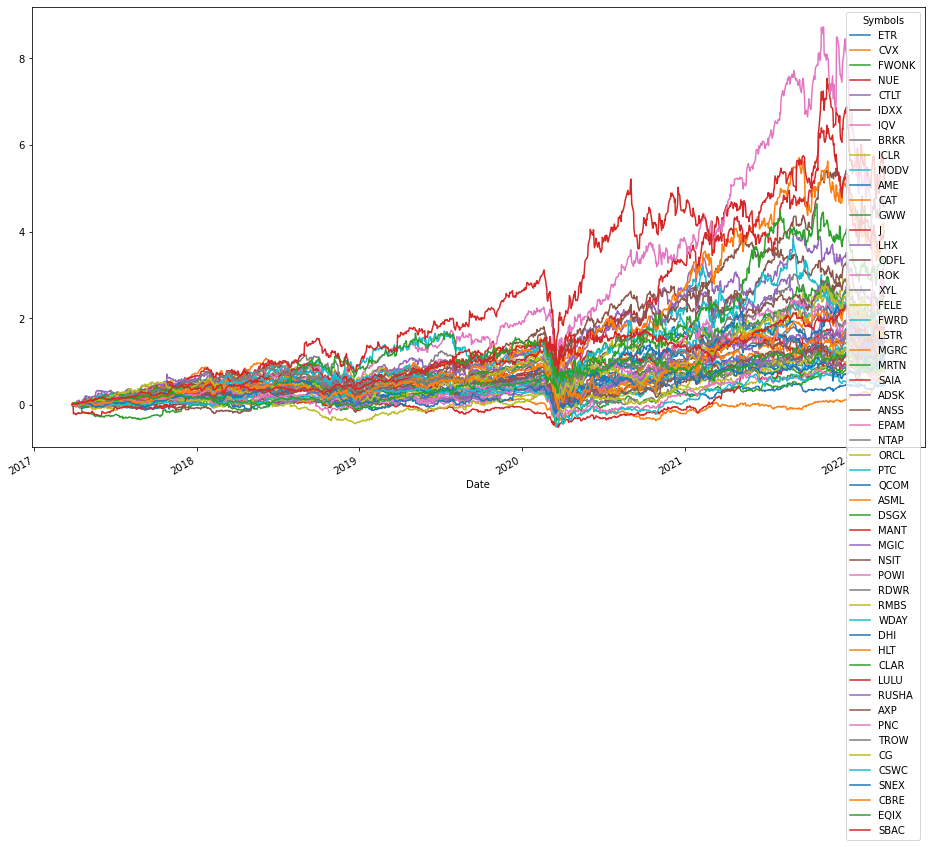

In [141]:
return_series_close.plot(figsize=(16,9))

In [142]:
return_series_close.tail(1)

Symbols,ETR,CVX,FWONK,NUE,CTLT,IDXX,IQV,BRKR,ICLR,MODV,...,RUSHA,AXP,PNC,TROW,CG,CSWC,SNEX,CBRE,EQIX,SBAC
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-25,0.501438,0.593056,0.98716,1.649076,2.763796,2.500454,1.855909,1.875935,2.02178,1.574087,...,1.49397,1.452062,0.662183,1.201981,1.8925,0.446012,1.121689,1.677745,0.849323,1.792784


In [143]:
correlation = return_series_close.corr()
# # # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [144]:
correlation

Symbols,ETR,CVX,FWONK,NUE,CTLT,IDXX,IQV,BRKR,ICLR,MODV,...,RUSHA,AXP,PNC,TROW,CG,CSWC,SNEX,CBRE,EQIX,SBAC
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,1.000000,-0.085058,0.585040,0.210250,0.531790,0.550164,0.659922,0.647615,0.636038,0.378586,...,0.383089,0.614540,0.342544,0.534730,0.550895,0.477859,0.404796,0.563378,0.658082,0.756749
CVX,-0.085058,1.000000,0.271300,0.406757,-0.278477,-0.198874,-0.042802,-0.035000,-0.106795,-0.226889,...,0.058675,0.245249,0.389189,-0.139424,0.023054,0.448925,-0.026063,0.131277,-0.437976,-0.326623
FWONK,0.585040,0.271300,1.000000,0.781071,0.741588,0.763259,0.835771,0.836568,0.814146,0.650894,...,0.841618,0.884273,0.841219,0.734806,0.886709,0.756931,0.734965,0.889885,0.643506,0.653801
NUE,0.210250,0.406757,0.781071,1.000000,0.618605,0.696008,0.734831,0.741603,0.684262,0.660358,...,0.797555,0.824193,0.882404,0.693477,0.805586,0.762786,0.720407,0.846449,0.436920,0.449938
CTLT,0.531790,-0.278477,0.741588,0.618605,1.000000,0.975621,0.923442,0.915977,0.934632,0.934447,...,0.870548,0.791937,0.660373,0.929633,0.897988,0.520348,0.863996,0.863930,0.924277,0.885328
IDXX,0.550164,-0.198874,0.763259,0.696008,0.975621,1.000000,0.959110,0.950029,0.941123,0.945657,...,0.863680,0.857011,0.716117,0.953180,0.918082,0.626163,0.872336,0.908765,0.894470,0.874238
IQV,0.659922,-0.042802,0.835771,0.734831,0.923442,0.959110,1.000000,0.974272,0.964979,0.864791,...,0.853042,0.930057,0.766487,0.926568,0.934639,0.747265,0.827241,0.949635,0.849266,0.880064
BRKR,0.647615,-0.035000,0.836568,0.741603,0.915977,0.950029,0.974272,1.000000,0.927792,0.876882,...,0.851295,0.929199,0.804993,0.939277,0.948117,0.759784,0.801081,0.954893,0.829903,0.849243
ICLR,0.636038,-0.106795,0.814146,0.684262,0.934632,0.941123,0.964979,0.927792,1.000000,0.850168,...,0.849583,0.871398,0.711775,0.912934,0.925686,0.634749,0.851813,0.917443,0.870414,0.898990


In [145]:
correlation1 = correlation[correlation < 0.2]
correlation1.dropna(thresh=1, inplace=True, axis=1)
correlation1.dropna(thresh=1, inplace=True, axis=0)

In [147]:
correlation1

Symbols,ETR,CVX,CTLT,IDXX,IQV,BRKR,ICLR,MODV,AME,CAT,...,HLT,CLAR,LULU,RUSHA,TROW,CG,SNEX,CBRE,EQIX,SBAC
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,NaN,-0.085058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVX,-0.085058,NaN,-0.278477,-0.198874,-0.042802,-0.035,-0.106795,-0.226889,-0.081641,0.070361,...,0.1642,-0.025329,-0.341245,0.058675,-0.139424,0.023054,-0.026063,0.131277,-0.437976,-0.326623
CTLT,NaN,-0.278477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDXX,NaN,-0.198874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQV,NaN,-0.042802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRKR,NaN,-0.035000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICLR,NaN,-0.106795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODV,NaN,-0.226889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AME,NaN,-0.081641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

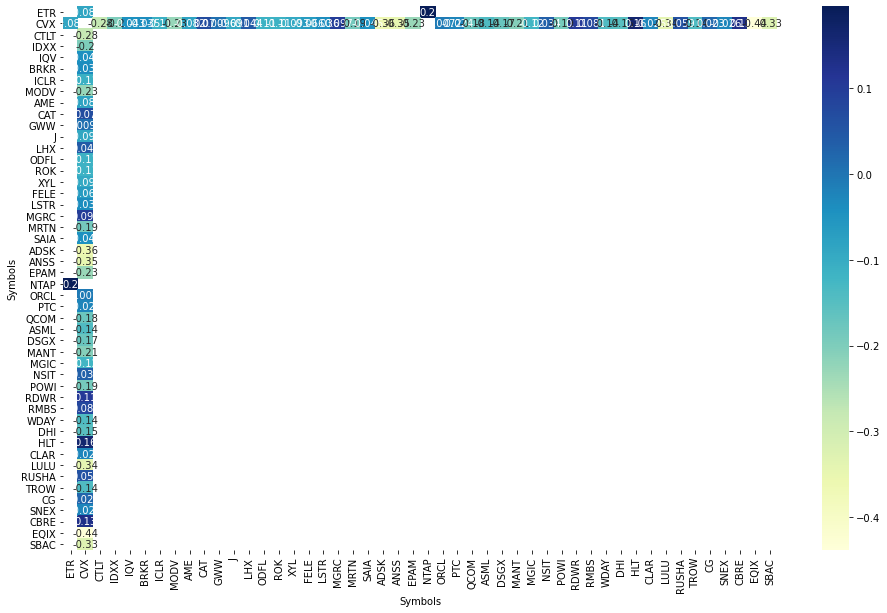

In [148]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation1, annot = True, ax = ax, cmap="YlGnBu")

In [150]:
len(correlation)

54

In [152]:
all_stocks = []
for each in correlation1:
    all_stocks.append(each)

In [157]:
len(all_stocks)

48

In [158]:
indexes = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [159]:
final_income_df = final_df_income.iloc[indexes]
final_income_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.0550,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,2.522661e+01,30.28,0.093351,0.260092,0.118782,0.519
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.3700,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378,0.523
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.861
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.903
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.782
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.9650,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.748
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.822
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.5100,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.629
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,1.635539e+01,25.95,0.178443,0.269622,0.206944,0.767
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,3.395254e+02,34.28,0.128603,0.314958,0.175801,0.743


In [160]:
final_income_df.to_csv("new_selected_stocks_income_v3.csv")